# **Hayashi-Heck cross-coupling regioselectivity multivariate linear regression (MLR) models**

Scripts used to generate the MLR models for the Hayashi-Heck cross-coupling regioselectivity data.

## 0. Imports

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from functions.plotting.plot_model import plot_model, get_error_plot

/var/folders/q_/pxh8rpm1021bvcmqb5qg17p00000gn/T/ipykernel_39944/125435029.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# this sets plot style defaults for the whole notebook

paramsscreen = {'backend': 'ps',
            'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 13,
           'ytick.labelsize': 13,
           'axes.titlesize': 16}

plt.rcParams.update(paramsscreen)

## 1. Define path to data and generate dataframe

This loads in the data used for the MLR models used in the manuscript. For simplicity, only the features used in the models have been provided. The column "Set" contains the ligands which are in the training and test splits. These were defined by the previous JACS 2023 study: link.

This also has the SIA MLR model paths defined below. 

In [3]:
data_path = Path("modeling_data")

# Leave the CSV file for the dataset you want to use uncommented below
data_file = "heck-data-conformers-mlr.csv"
# data_file = "heck-data-lec-mlr.csv"
# data_file = "heck-data-regen-lec-mlr.csv"
response_column = "rr_ddg"

# These are for the SIA models
# data_file = "sia-data-3comp-mlr.csv"
# response_column = "4methylmorpholine_ddg"

df = pd.read_csv(data_path / data_file, index_col=0).dropna()

# This is for the SIA models
features = df.drop(columns=[response_column, "Set"])

display(df.head())

,Set,rr_ddg,P2_NMR_cmax,P2_Pd_bond_occ_boltz,NoPd_P_R2_bond_eng_Max_boltz
pp000006-PdCl2,Training,1.78,126.1896,1.855812,-0.473998
pp000008e-PdCl2,Training,1.89,119.5496,1.855059,-0.471816
pp000009-PdCl2,Training,1.81,124.9492,1.855489,-0.471237
pp000015-PdCl2,Training,0.78,106.5721,1.865417,-0.506608
pp000027-PdCl2,Training,0.79,128.6403,1.856709,-0.485491


## 2. Data distribution analysis

In [4]:
X_train = df[df["Set"] == "Training"].drop(columns=[response_column, "Set"])
X_test = df[df["Set"] == "Test"].drop(columns=[response_column, "Set"])
y_train = df[df["Set"] == "Training"][response_column]
y_test = df[df["Set"] == "Test"][response_column]

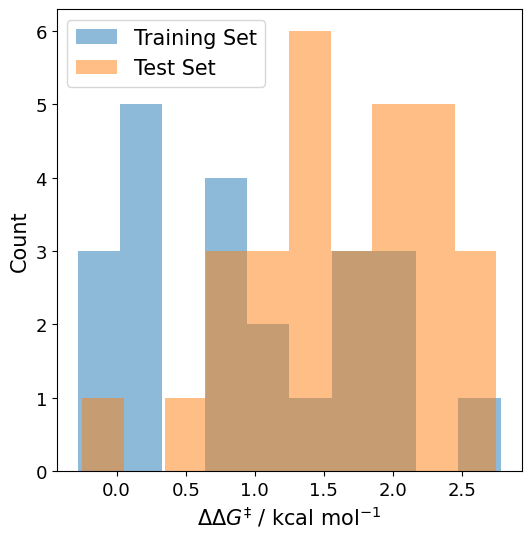

In [5]:
plt.figure(figsize=(6, 6))
plt.hist(y_train, label="Training Set", alpha=0.5)
plt.hist(y_test, label="Test Set", alpha=0.5)
plt.xlabel("$\Delta \Delta G ^{\u2021}$ / kcal mol$^{-1}$")
plt.ylabel("Count")
plt.legend()
plt.show()

## 3. Run MLR model

First, the features are scaled using the scikit-learn `StandardScaler`.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Next, run the MLR model.

In [7]:
mlr = linear_model.LinearRegression()

mlr.fit(X_train_scaled, y_train)
y_train_pred = mlr.predict(X_train_scaled)
y_test_pred = mlr.predict(X_test_scaled)

Plot the model.

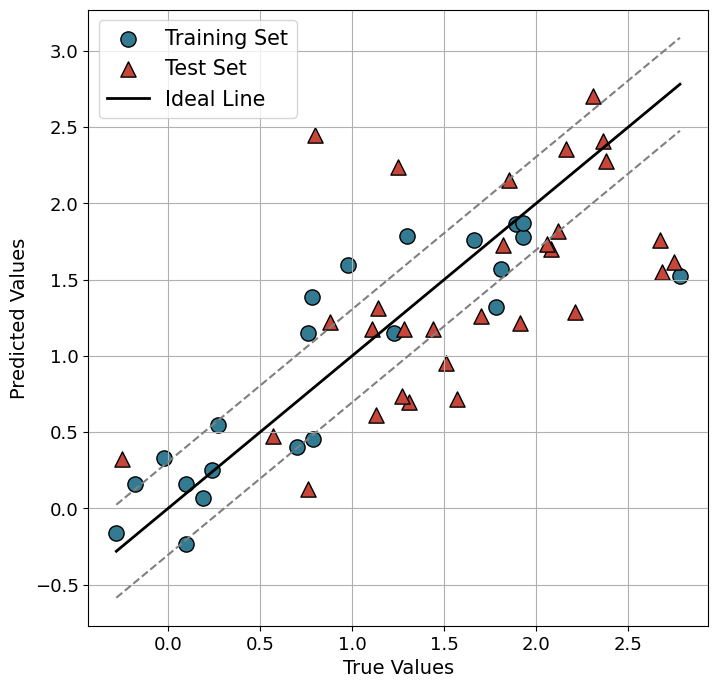

Model Statistics:
Training R²: 0.758
Test R²: 0.571
Training MAE: 0.305
Test MAE: 0.512
Training MSE: 0.167
Test MSE: 0.407
Training RMSE: 0.408
Test RMSE: 0.638


In [8]:
plot_model(y_train, y_test, y_train_pred, y_test_pred)

Get model equation.

In [9]:
print("MLR equation: \n")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {mlr.coef_[i]:.3f}")
print(f"Intercept: {mlr.intercept_:.3f}")

MLR equation: 

P2_NMR_cmax: -0.861
P2_Pd_bond_occ_boltz: 0.454
NoPd_P_R2_bond_eng_Max_boltz: 0.661
Intercept: 0.943


Make model error distribution.

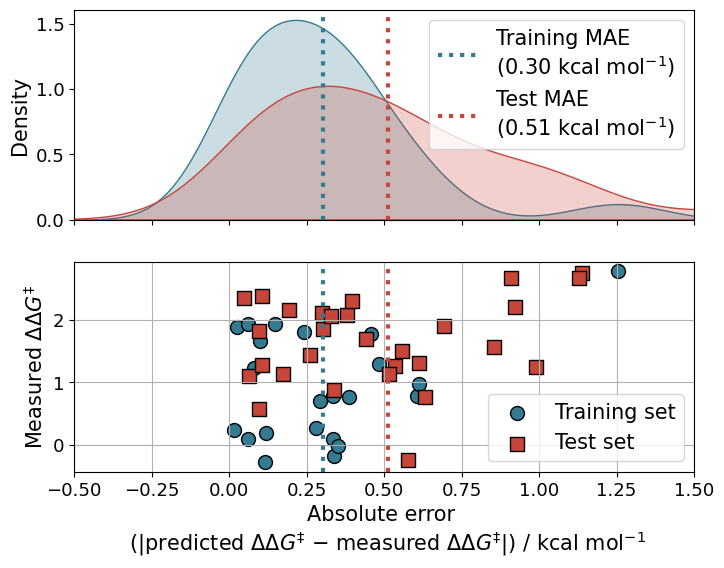

In [10]:
get_error_plot(y_train, y_test, y_train_pred, y_test_pred)